<a href="https://colab.research.google.com/github/aromanenko/ATSF/blob/main/1_IntroTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SAS & HSE, Applied Time Series Forecasitng , Fall 2021 

<font color="blue"> Lesson #1: Time Series Problems Overview</font>

<span style="color:black; font-size: 12pt"></span>

Alexey Romanenko,
<font color="blue">alexromsput@gmail.com</font>

# Key words
* [Time Series Overview](#overviewts)
  - [What is a Time Series?](#defts)
  - [TS in Retail](#retailts)
  - [TS in Finance](#financets)
  - [TS in Energy Market](#eproductionts)
  - [TS in Manufacturing](#manufactiringts)
  - [TS in Natural Processes](#financets)
* [Basic terms](#basicterms)
* [Simple ts forecasting approaches](#simpleapproaches)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from google.colab import files
from IPython.display import Image
uploaded = files.upload()
%matplotlib inline

# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn import model_selection
# import scipy as sc

# Time Series Overview

### TS in Retail

In [11]:
rt_df = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/main/data/retail_2products.csv', sep = ';',parse_dates=['Date']).set_index('Date')
rt_df.head()

,Store_id,SKU_id,Promo,Demand,Regular_Price,Promo_Price
Date,,,,,,
2015-01-01,1,1,NaN,22,163.78,NaN
2015-02-01,1,1,NaN,41,163.78,NaN
2015-03-01,1,1,NaN,35,163.78,NaN
2015-04-01,1,1,NaN,72,163.78,NaN
2015-05-01,1,1,NaN,25,163.78,NaN


### TS in Finance


In [ ]:
# DJ data https://query.data.world/s/5wc4pg4jsopcqdvwn2l6o7iefmn4du
# Nadaq data https://query.data.world/s/7i4qprw6j7mauc2fb2ge7pzxlmbeos

dj_df = pd.read_csv('https://query.data.world/s/5wc4pg4jsopcqdvwn2l6o7iefmn4du', parse_dates=['Date']).set_index('Date')
dj_df.head()

,Value
Date,
1977-09-02,872.31
1977-09-09,857.04
1977-09-16,856.81
1977-09-23,839.14
1977-09-30,847.11


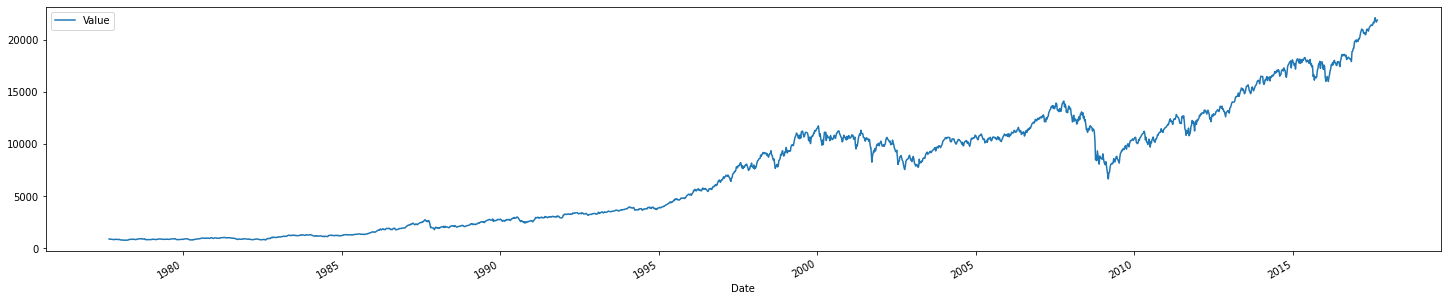

In [ ]:
dj_df.plot(figsize = (25,5))

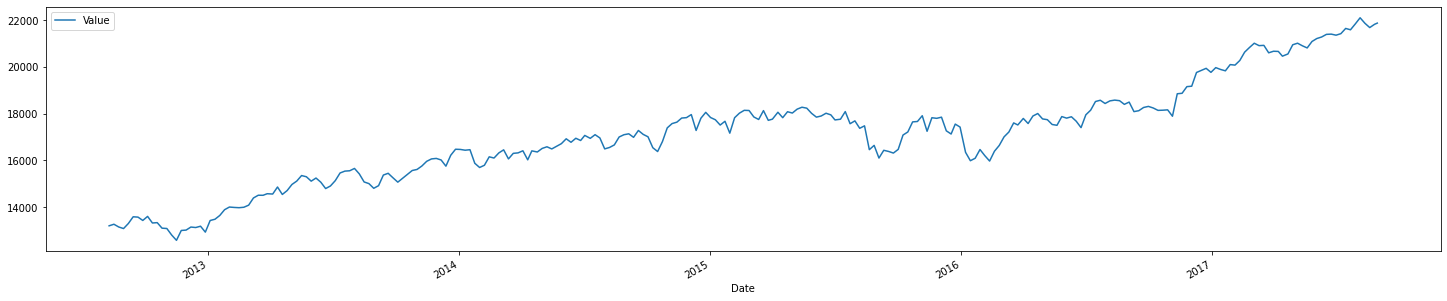

In [ ]:
# last 5 years
dj_df.tail(265).plot(figsize = (25,5))

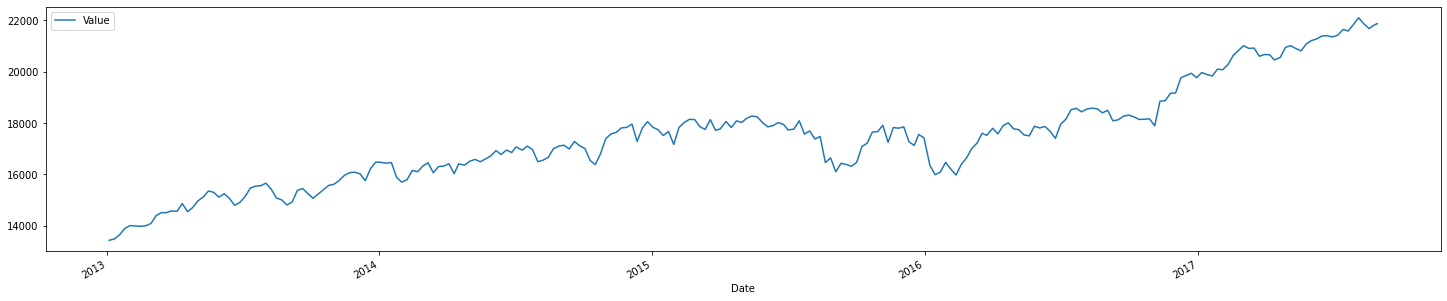

In [ ]:
# since 2015 year
dj_df['2013-01-01':].plot(figsize = (25,5))

* Answer questions

### TS in Energy Market

In [14]:
# ts = pd.read_csv('consumption_train.csv', sep='\t', decimal=',')
en_df = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/main/data/energy_consump.csv', decimal='.', parse_dates=['Date'], dayfirst=False, index_col='Date') 
en_df.tail(10)

,Hub,ZSP,EnergyConsump,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
Date,,,,,,,,,,,,,,,,,,,,
2015-05-18,Center,FZSZOE27,NaN,7.7,7.5,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-19,Center,FZSZOE27,NaN,8.5,8.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-20,Center,FZSZOE27,NaN,9.9,7.9,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-21,Center,FZSZOE27,NaN,12.0,10.4,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-22,Center,FZSZOE27,NaN,11.0,11.6,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-23,Center,FZSZOE27,NaN,11.7,11.9,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-24,Center,FZSZOE27,NaN,12.4,12.8,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-25,Center,FZSZOE27,NaN,16.2,15.4,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-26,Center,FZSZOE27,NaN,18.7,17.3,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


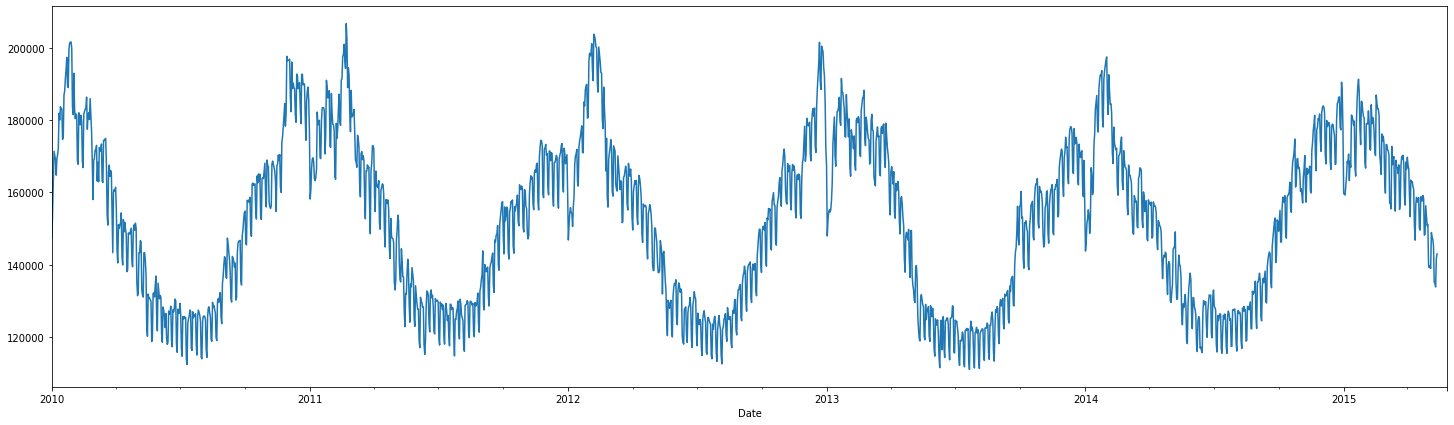

In [17]:
# Plot time series
en_df['EnergyConsump'].plot(figsize=(25,7))

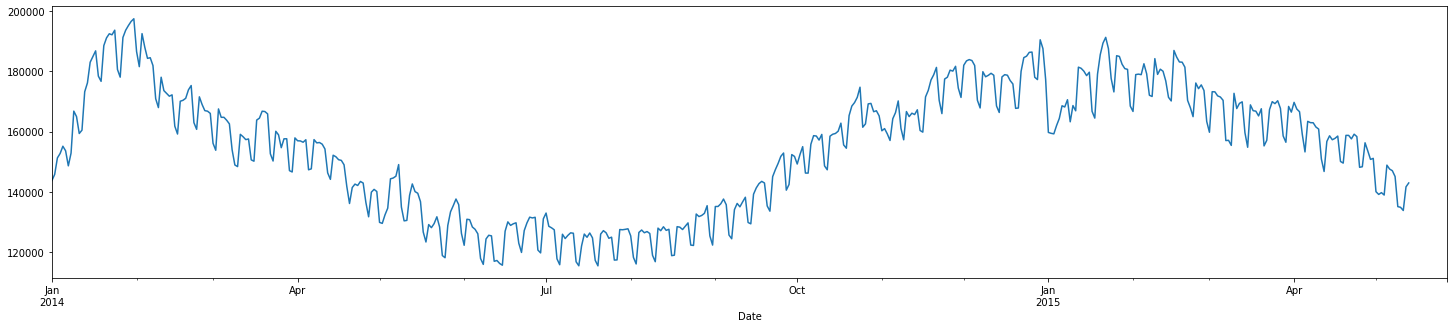

In [28]:
# last 1.5 years of data
en_df.loc['2014-01-01':'2016-01-01', 'EnergyConsump'].plot(figsize=(25,5))

In [ ]:
# the first day
ts.ix['2015-01-03':'2015-01-03 23:00:00', range(1)].plot(figsize=(15,5))

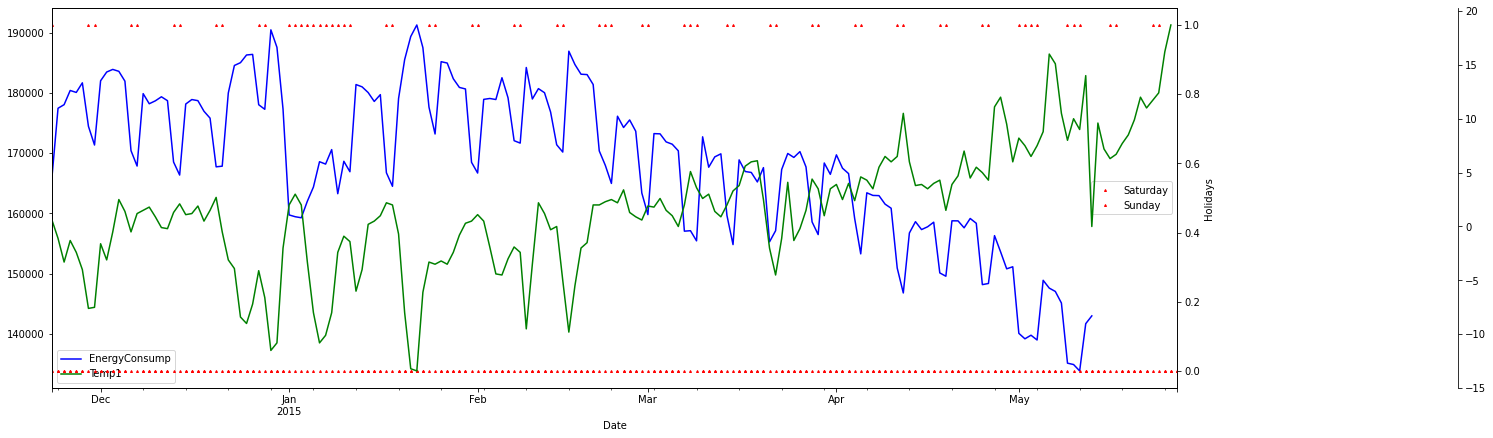

In [30]:
# Driver analysis
fig, ax = plt.subplots(figsize=(25,7))

ax2, ax3 = ax.twinx(), ax.twinx()
ax2.set_ylabel('Holidays')
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

en_df['EnergyConsump'].tail(186).plot(ax = ax,  style='b-')
en_df[['Saturday', 'Sunday']].tail(186).plot(ax = ax2, style='r', marker = '^', markersize = 2.0, linewidth=0.0)
en_df['Temp1'].tail(186).plot(ax = ax3,  style='g-')

lines = ax.get_lines() + ax3.get_lines() #  ax2.get_lines() 
ax.legend(lines, [l.get_label() for l in lines], loc='lower left')
# uncomment to save the figure
# plt.savefig('../Lecture_TS_Forecasting/pic/Energy_WeekSeasonality.png', bbox_inches='tight', pad_inches=0) # 
# plt.savefig('../Lecture_TS_Forecasting/pic/Energy_WeekSeasonality.eps', bbox_inches='tight', pad_inches=0, format='eps', dpi=1000) 

## TS in Manufacturing
<!-- ![picture](https://www.nicepng.com/png/full/406-4065509_almacen-warehouse-zones.png) -->
<img src="https://www.nicepng.com/png/full/406-4065509_almacen-warehouse-zones.png" alt="Drawing" style="width: 100px;"/>

In [53]:
# ts = pd.read_csv('consumption_train.csv', sep='\t', decimal=',')
ww_df = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/main/data/ww_statistics.csv', decimal='.', parse_dates=['day'], dayfirst=False, index_col='day') 
ww_df.tail(10)

,GSM pcs,Accessories pcs,DECT pcs,Battery pcs,Photo pcs,Offline stores,Online Orders,New Stores,Accessories lines,Total lines,Cards pcs,SIM pcs,main manhours,cargo manhours,students manhours,total manhours
day,,,,,,,,,,,,,,,,
2012-10-23,33497.0,61938.0,7799.0,NaN,14819.0,1026.0,1318.0,1.165863,49797.0,101258.0,18221.0,17902.0,855.000000,0.0,608.000000,1250.200000
2012-10-24,32615.0,71476.0,8814.0,NaN,14526.0,996.0,1351.0,1.157054,59848.0,110134.0,21050.0,13850.0,848.750000,0.0,586.250000,1229.812500
2012-10-25,27730.0,64317.0,7113.0,NaN,12833.0,930.0,1198.0,1.110733,56738.0,100828.0,32626.0,6830.0,760.000000,0.0,568.000000,1129.200000
2012-10-26,22354.0,68496.0,5470.0,NaN,10315.0,981.0,966.0,1.098673,60016.0,97058.0,105690.0,7525.0,690.000000,0.0,536.666667,1038.833333
2012-10-27,26738.0,68550.0,6766.0,NaN,12486.0,1067.0,1658.0,1.111877,58439.0,103015.0,22888.0,19797.0,805.000000,0.0,612.500000,1203.125000
2012-10-28,26004.0,61182.0,4869.0,NaN,13143.0,1120.0,1463.0,1.148024,51682.0,91634.0,27433.0,9202.0,708.333333,0.0,550.000000,1065.833333
2012-10-29,28592.0,71805.0,7078.0,NaN,15859.0,1095.0,1423.0,1.224098,55450.0,100755.0,24427.0,2067.0,822.500000,0.0,560.000000,1186.500000
2012-10-30,24185.0,63759.0,7949.0,NaN,13645.0,1021.0,1313.0,1.174418,50826.0,93270.0,10183.0,15020.0,751.750000,0.0,558.000000,1114.450000
2012-10-31,24776.0,73836.0,8740.0,NaN,15734.0,995.0,1404.0,1.151865,61329.0,106858.0,11030.0,12509.0,841.500000,0.0,637.500000,1255.875000


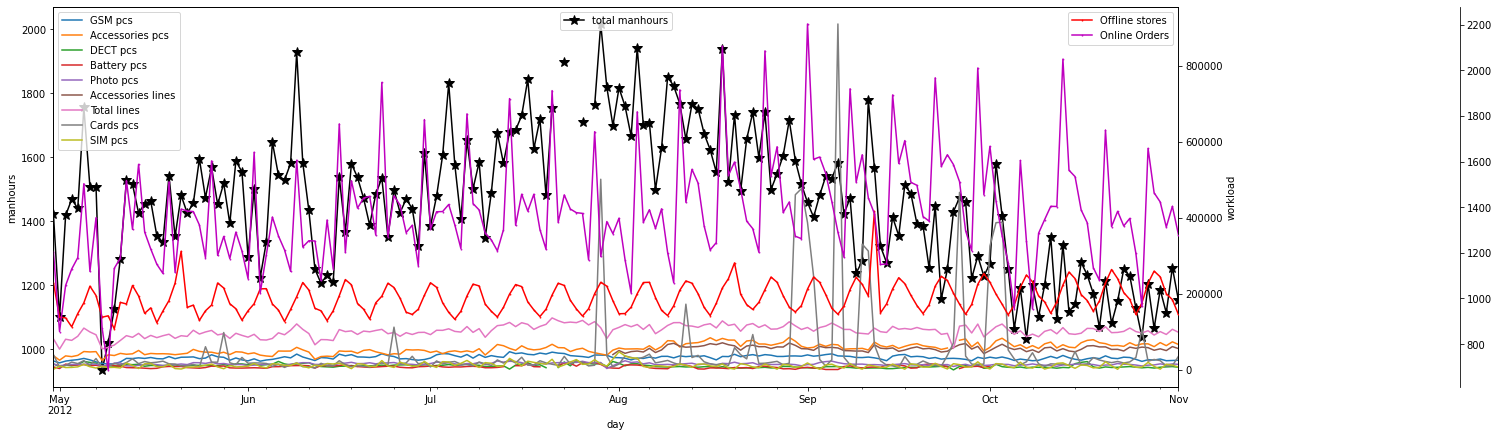

In [57]:
# Driver analysis
fig, ax = plt.subplots(figsize=(25,7))

ax.set_ylabel('manhours')

ax2, ax3 = ax.twinx(), ax.twinx()
ax2.set_ylabel('workload')
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

ww_df['total manhours'].tail(186).plot(ax = ax,  style='k-', marker = '*', markersize = 10.0)
ww_df[list(ww_df.columns[:5])+list(ww_df.columns[8:12])].tail(186).plot(ax = ax2)
ww_df[ww_df.columns[5:7]].tail(186).plot(ax = ax3, style=['r', 'm'], marker = '^', markersize = 1.0)
ax.legend(loc = 'upper center')
ax2.legend(loc = 'upper left')

# lines = ax.get_lines() + ax3.get_lines() +  ax2.get_lines() 
# ax.legend(lines, [l.get_label() for l in lines], loc='out')

### TS in Nature

# Time Series Forecasting Problem

## Basic terms

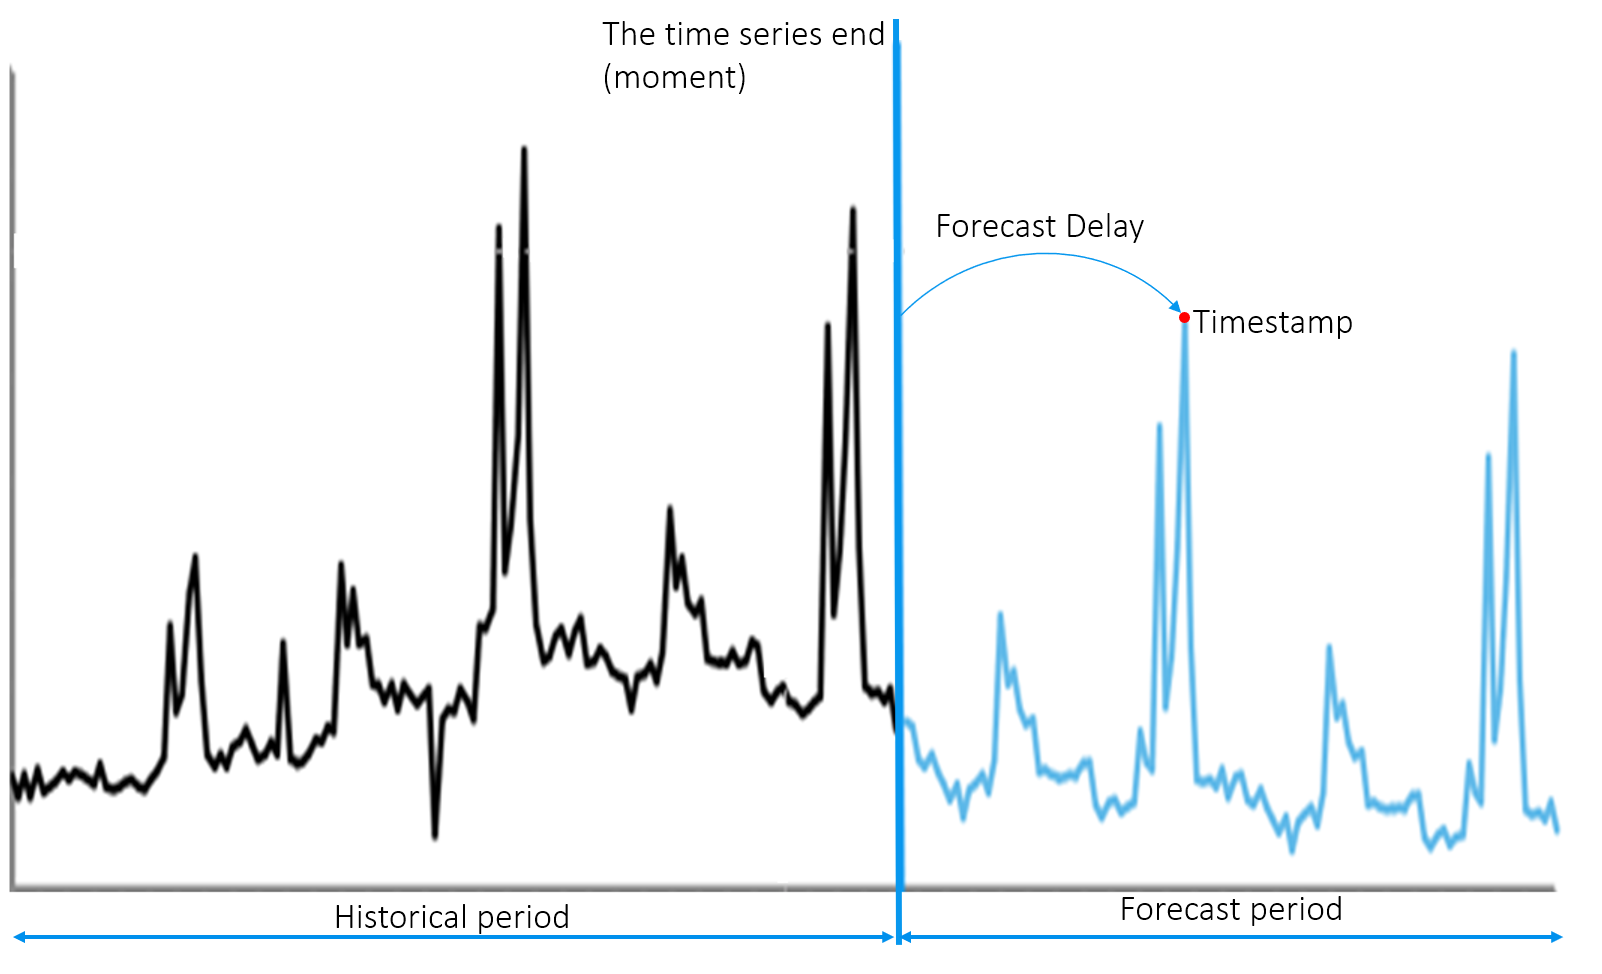

In [7]:
Image('definitions (1).png', height=500, width=1000)

<font color = 'blue'>Def0.</font> The <font color='red'>time series</font>  is a series of data points taken at successive equally spaced points in time indexed in time order.

<font color = 'blue'>Def1.</font> The <font color='red'>forecast period</font> is the period of time into the future for which forecasts are to be prepared.The forecast period usually is started just after the moment when the last actual value is known (<font color='red'>the end of time series</font>) and inlcudes several timestamps.

<!-- ![picture](https://github.com/aromanenko/ATSF/blob/main/pic/definitions.png) -->

<font color = 'blue'>Def2.</font> Let we a given a particular timestamp $t$ of the forecast period. The <font color='red'>forecast delay</font> describes how far $t$ is located from the end of time series.

<font color = 'blue'>Def3.</font> The <font color='red'>forecast horizon</font> is length of the forecast period . The forecast horizon is measured in timestamps (forcast horizon is 52). 
In business communications the forecast horizon usually is descibed in time intervals (2 years, 24 months,  104 weeks).

These generally vary from short-term forecasting horizons (less than three months) to long-term horizons (more than two years).


**Questions**
  * What is the difference between forecast delay and forecast horizon?

  * You are asked to build forecast on a monthly basis (one forecast release per month) but in weekly granularity (timestamps of a time series refers to a week). Business requires build forecast for next 24  months, what should be the forecast horizon in timestamps? 

## Hidden components of a time series

In [ ]:
import statsmodels.api as sm

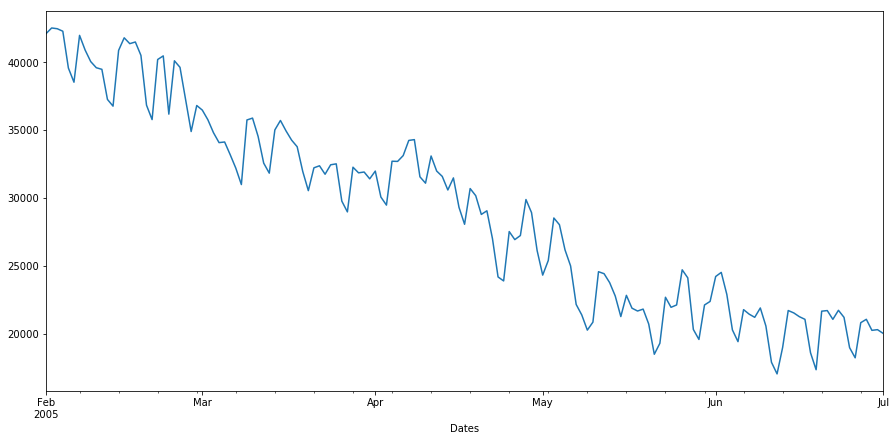

In [ ]:
ts['EnergyCons'].ix['2005-02-01 00:00':'2005-07-01 23:00'].resample("D").sum().plot(figsize=(15,7))

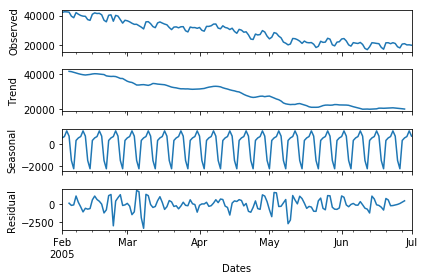

In [ ]:
res = sm.tsa.seasonal_decompose(ts['EnergyCons'].ix['2005-02-01 00:00':'2005-07-01 23:00'].resample("D").sum())
resplot = res.plot()

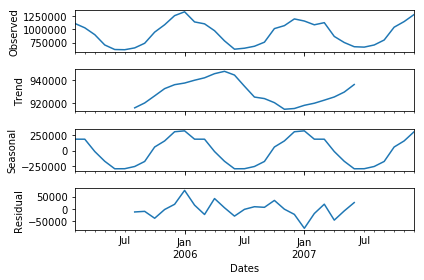

In [ ]:
# fig = plt.figure(figsize=(15,10))
res = sm.tsa.seasonal_decompose(ts['EnergyCons'].ix['2005-02-01 00:00':'2008-01-01 23:00'].resample("M").sum())
resplot = res.plot()

# Simple ts Forecasting Approaches 

## Autoregression: build matrix of autoregression

In [ ]:
# hankel matrix https://en.wikipedia.org/wiki/Hankel_matrix
sc.linalg.hankel([1,2,3,4], [4,7,7,8,9])

array([[1, 2, 3, 4, 7],
       [2, 3, 4, 7, 7],
       [3, 4, 7, 7, 8],
       [4, 7, 7, 8, 9]])

In [ ]:
def get_autoregrmatrix(x,h,K):
    L = len(x)
    X = sc.linalg.hankel(x[:L-h-K+1], 
                          np.hstack((x[-K],x[-K:-1]))) # is needed to repeat x[-K] in second part
    y = x[K+h-1:]
    return X,y

## Forecast for next hour (h=1) using 1 week history (K=168)

In [ ]:
K=168
h = 1 # delay

x_train = ts['EnergyCons'].ix['2005-01-01 00:00:00':'2006-01-01 00:00:00']
x_test = ts['EnergyCons'].ix['2006-01-01 00:00:00':'2006-01-30 00:00:00']

X_train, y_train = get_autoregrmatrix(x_train,h,K)
X_test, y_test = get_autoregrmatrix(x_test,h,K)

In [ ]:
print X_train.shape
print y_train.shape

(8593L, 168L)
(8593,)


In [ ]:
# Matrix of Samples and Regressors
X_train

array([[1290, 1266, 1273, ..., 1377, 1302, 1256],
       [1266, 1273, 1280, ..., 1302, 1256, 1257],
       [1273, 1280, 1293, ..., 1256, 1257, 1267],
       ..., 
       [1332, 1293, 1225, ..., 1541, 1394, 1349],
       [1293, 1225, 1222, ..., 1394, 1349, 1312],
       [1225, 1222, 1278, ..., 1349, 1312, 1284]], dtype=int64)

In [ ]:
# Target Vector
y_train

Timestamp
2005-01-08 00:00:00    1257
2005-01-08 01:00:00    1267
2005-01-08 02:00:00    1274
2005-01-08 03:00:00    1339
2005-01-08 04:00:00    1376
2005-01-08 05:00:00    1400
2005-01-08 06:00:00    1439
2005-01-08 07:00:00    1504
2005-01-08 08:00:00    1557
2005-01-08 09:00:00    1518
2005-01-08 10:00:00    1500
2005-01-08 11:00:00    1501
2005-01-08 12:00:00    1546
2005-01-08 13:00:00    1645
2005-01-08 14:00:00    1718
...
2005-12-31 10:00:00    1648
2005-12-31 11:00:00    1622
2005-12-31 12:00:00    1662
2005-12-31 13:00:00    1755
2005-12-31 14:00:00    1841
2005-12-31 15:00:00    1851
2005-12-31 16:00:00    1822
2005-12-31 17:00:00    1773
2005-12-31 18:00:00    1714
2005-12-31 19:00:00    1645
2005-12-31 20:00:00    1541
2005-12-31 21:00:00    1394
2005-12-31 22:00:00    1349
2005-12-31 23:00:00    1312
2006-01-01 00:00:00    1284
Name: EnergyCons, Length: 8593

Train score: 0.996, Test score: 0.970


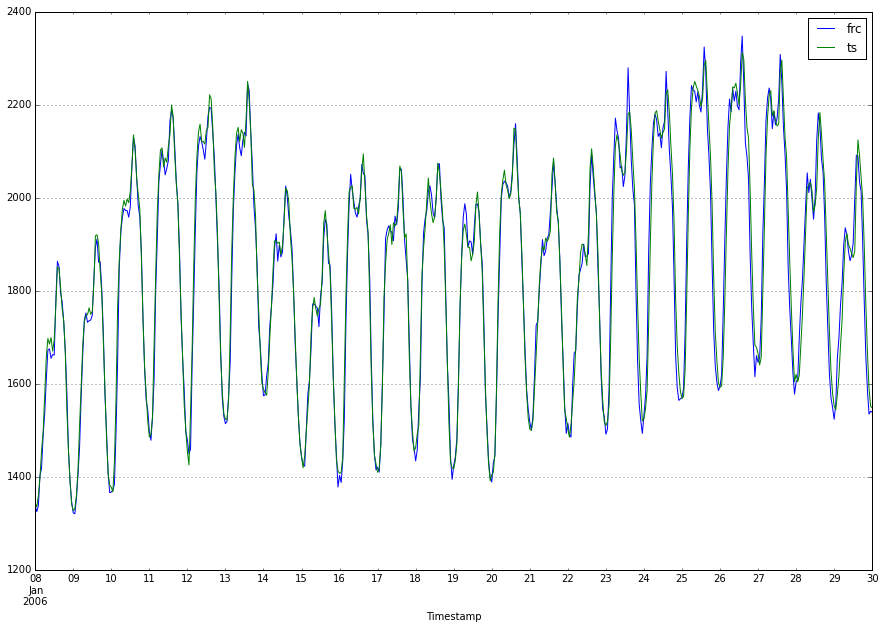

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print('Train score: %.3f, Test score: %.3f'% (linear_regression.score(X_train, y_train), linear_regression.score(X_test, y_test)))
pd.DataFrame({'ts':y_test, 'frc': linear_regression.predict(X_test)}).plot(figsize(15,10))

## Try another delay: h=168

Train score: 0.934, Test score: 0.871


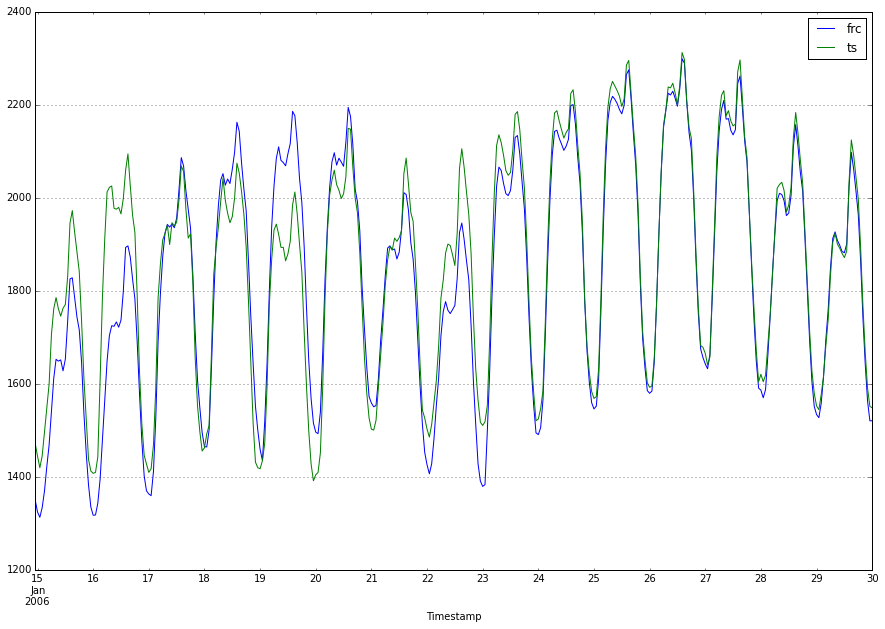

In [ ]:
K=168
h = 168 # delay

x_train = ts['EnergyCons'].ix['2005-01-01 00:00:00':'2006-01-01 00:00:00']
x_test = ts['EnergyCons'].ix['2006-01-01 00:00:00':'2006-01-30 00:00:00']

X_train, y_train = get_autoregrmatrix(x_train,h,K)
X_test, y_test = get_autoregrmatrix(x_test,h,K)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print('Train score: %.3f, Test score: %.3f'% (linear_regression.score(X_train, y_train), linear_regression.score(X_test, y_test)))
pd.DataFrame({'ts':y_test, 'frc': linear_regression.predict(X_test)}).plot(figsize(15,10))

<h1 align="center"> Home Work 0</h1>

# Selfcheck questions 
  ** 1. What is a time series? **
            
  ** 2. What is a delay and a horizon of time series forecast?**
   
  ** 3. Remember at least 3 features in the data that can be observed in the retail time series.**
         
  ** 4.  Remember at least 3 features in the data that can be observed in the finance time series.** **
            
  ** 5.  Remember at least 3 features in the data that can be observed in the energy consumption time series.**
          
  ** 6. What is naive forecasting approach?**

  ** 7. What is the solution of linear regression via LS method (in terms of matrix $X, \alpha, Y$)? **
  
  ** 8. What hankel transformation of a matrix? **
          

# Practical Task (optional)
Draw dependence of the cross_validation score (linear_regression.score) on the horizon of the forecast for LR model in the case of energy consumption forecasting problem. You should write down code to show dependence for $h=1,2,\dots, 720$. You can choose amount of regressors of LR in experiment as much as you want.   

In [ ]:
# Solution wirte there
